# kNN Classifier for breast cancer
The goal of this software is to predict the binary-valued "Diagnosis" variable in the data.
The algorithm used for this task is the kNN (k nearest neighbors).

In [1]:
# initial imports for data handling
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

In [2]:
# create dataframe from fetched data
df = pd.DataFrame(breast_cancer_wisconsin_diagnostic.data.original)
# describe all variables in the dataframe
df.describe(include='all')

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [3]:
# investigate contents of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

## Data preparation
This dataset has the "ID" field which is useless for the model.
Before standardization, the field will be removed from the dataframe.

In [4]:
df = df.drop(columns='ID')
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

## Standardization
All numerical value variables in the dataframe must be standardized.
The kNN algorithm can not be used without standardized data.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Split the dataframe in X and y columns for the model
X = df.drop(columns='Diagnosis')
y = df['Diagnosis']


In [6]:
# Scale X columns (inputs)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Model training
The model can now be trained using the data prepared in the previous steps.
The k nearest neighbors values to be tested are 3, 4, 5, 6, 7, 9, 11 and 13.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)
k_values = [3, 4, 5, 6, 7, 9, 11, 13]
knn_results = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_results[k] = knn


With the models trained, now they can be tested for accuracy.
The tests will be done using the sklearn accuracy_score and kNN prediction.

In [8]:
from sklearn.metrics import accuracy_score
for k, model in knn_results.items():
    pred = model.predict(X_test)
    print(f"k={k}, accuracy={accuracy_score(y_test, pred):.3f}")

k=3, accuracy=0.982
k=4, accuracy=0.977
k=5, accuracy=0.977
k=6, accuracy=0.965
k=7, accuracy=0.971
k=9, accuracy=0.982
k=11, accuracy=0.982
k=13, accuracy=0.982


From testing these different values for k, we can determine that k=3 performs just as well as k>=9.
Thus, the k value that will be used for this model is 3, based on these results.


## Testing the model
Using the values acquired from previous steps, the next part will test the model's accuracy.
The model will be tested by using accuracy, precision and recall when k=3.

In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# create the kNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
print(f"accuracy={accuracy:.3f}")
print(f"precision={precision:.3f}")
print(f"recall={recall:.3f}")

accuracy=0.982
precision=0.971
recall=0.985


Next, a confusion matrix will be created from these values for further analysis.

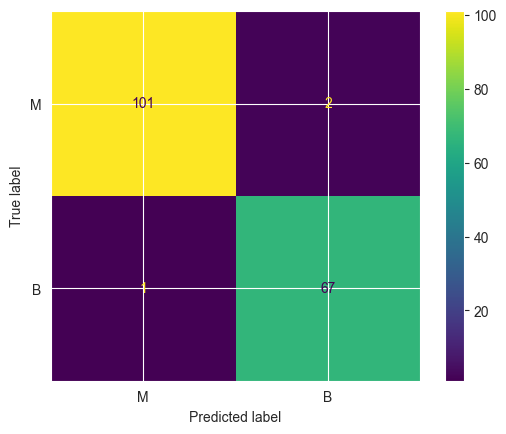

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['M', 'B'])
disp.plot()
plt.show()

Final values for the model:
k=3
accuracy=0.982
precision=0.971
recall=0.985

## Summary
Overall, the results gained from this test are good. 
Based on testing with k=3, the model has achieved an accuracy of 98%, with high precision and recall.
This model could be quite accurate when predicting malignant or benign breast cancer, if these results apply to real cases.